In [1]:
import random
import pandas as pd

# Create a list of product names
products = ['Apple', 'Banana', 'Orange']

# Assign a price to each product
prices = {'Apple': 1.99, 'Banana': 0.79, 'Orange': 2.49}

# Create a list of transaction data
data = []
for i in range(10):
    transaction = {
        'product': random.choice(products),
        'price': prices[random.choice(products)],
        'quantity': random.randint(1, 10),
        'date': '2022-01-0' + str(i+1),
        'total': 0
    }
    transaction['total'] = round(transaction['price'] * transaction['quantity'], 2)
    data.append(transaction)

# Create a DataFrame from the transaction data
df = pd.DataFrame(data)
df.drop(columns=['total'], inplace=True)

In [2]:
df.to_excel("sales.xlsx", index=False)

In [3]:
import pandas as pd
import numpy as np
from faker import Faker

# Initialize the Faker object
fake = Faker()

# Define the number of transactions to simulate
num_transactions = 10000

# Create empty lists to store the data
dates = []
customer_age = []
products = []
prices = []
quantities = []

# Define the product list
product_list = ["Product A", "Product B", "Product C", "Product D", "Product E", "Product F", "Product G", "Product H", "Product I", "Product J"]

# Define the price list
price_list = [10,20,30,40,50,60,70,80,90,100]

# Define the ratio of older to younger customers
old_customer_ratio = 0.2
young_customer_ratio = 0.8

# Define the average purchase value for older and younger customers
old_customer_avg_purchase = 50
young_customer_avg_purchase = 20

# Simulate the data
for _ in range(num_transactions):
    # Assign a date within the last year
    dates.append(fake.date_between(start_date='-1y', end_date='today'))
    # Assign a random age to the customer
    customer_age.append(fake.random_int(min=18, max=80))
    # Assign a random product to the customer
    products.append(np.random.choice(product_list))
    # Assign the corresponding price to the product
    prices.append(price_list[product_list.index(products[-1])])
    # Assign a random quantity to the customer
    if customer_age[_] < 40:
        # Assign a quantity based on the young customer average purchase value
        quantities.append(np.random.normal(young_customer_avg_purchase / prices[-1],1))
    else:
        # Assign a quantity based on the old customer average purchase value
        quantities.append(np.random.normal(old_customer_avg_purchase / prices[-1],1))

transactions_df = pd.DataFrame({'date': dates, 'customer_age': customer_age, 'product': products, 'price': prices, 'quantity': quantities})
transactions_df["quantity"] = transactions_df["quantity"].apply(lambda x: x if x>0 else 0)
transactions_df.head()

,date,customer_age,product,price,quantity
0,2022-10-02,28,Product H,80,1.558574
1,2022-04-23,47,Product A,10,5.244605
2,2022-11-16,29,Product D,40,0.570323
3,2022-08-17,75,Product G,70,1.689713
4,2022-03-31,54,Product B,20,2.513816


## Simulation - Einführende Fallstudie

Datensatz:

- alte und junge Kunden 
- über die Zeit hat sich Anteil an jungen Kunden erhöht
- Umsatz rückläufig, weil junge Kunden weniger ausgeben, d.h. andere Produkte und weniger Umsatz pro Kunde

In [4]:
import pandas as pd # Data manipulation
import numpy as np
import scipy.stats as stats # Statistical analysis; mainly distributions
from faker import Faker # Generate fake data
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

In [5]:
def perc_young_trend(start_perc: float, end_perc: float, n: int) -> np.ndarray:
    """
    Simulate percentage of young customers trend over time
    
    Args:
        start_perc (float): percentage of young customers at the start of the simulation
        end_perc (float): percentage of young customers at the end of the simulation
        n (int): number of time steps to simulate

    Returns:
        np.ndarray: percentage of young customers trend over time
    """
    # create a time series trend
    trend = np.linspace(start_perc, end_perc, n)
    # add some noise to the trend
    noise = np.random.normal(0, 0.06, n)

    perc = trend + noise

    # Ensure that perc is between 0 and 1
    perc = np.clip(perc, 0.01, 0.99)

    return perc

In [6]:
np.random.seed(10)

n_transactions = 10_000 # Number of transactions to simulate
start_perc_young = 0.2 # Percentage of young customers at the start of the simulation
end_perc_young = 0.7 # Percentage of young customers at the end of the simulation

# Define parameters for the young and old customers (average price, average quantity, etc.)
paras_customer = {"avg_price": [19, 39], "avg_quantity": [2, 4], "age": [22, 50]}
dist = stats.poisson # Distribution to use for the price and quantity and the age

# Fake data generator to generate
# - fake customer names
# - fake customer ages
fake = Faker(locale="de-DE")
perc_young = perc_young_trend(start_perc_young, end_perc_young, n_transactions)

data = {"customer_age": [], "customer_name": [], "customer_payment_method": [], "price": [], "quantity": [],  "wochentag": []}
for i in range(0, n_transactions):
    customer_type = np.random.choice([0, 1], p=[perc_young[i], 1-perc_young[i]])
    customer_age = dist.rvs(paras_customer["age"][customer_type]) + 7
    customer_name = fake.name()
    customer_payment_method = np.random.choice(["Kreditkarte", "Bar", "EC-Karte"])
    wochentag = np.random.choice(["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag"], p=[0.15, 0.15, 0.15, 0.15, 0.15, 0.25])
    
    # Minimum price is 1
    price = dist.rvs(paras_customer["avg_price"][customer_type]) + 1.99
    
    # Minimum quantity is 1
    quantity = dist.rvs(paras_customer["avg_quantity"][customer_type]) + 1
    total = price * quantity

    data["customer_age"].append(customer_age)
    data["customer_name"].append(fake.name())
    data["customer_payment_method"].append(customer_payment_method)
    data["price"].append(price)
    data["quantity"].append(quantity)
    data["wochentag"].append(wochentag)

# Create a DataFrame from the transaction data and translate column names to German
df = pd.DataFrame(data)
df.columns = ["Alter", "Kundenname", "Zahlungsmethode", "ø Preis", "Menge", "Wochentag"]
df = df[["Kundenname", "Alter", "Zahlungsmethode", "ø Preis", "Menge", "Wochentag"]]

# Add column "Datum" with sorted Dates from 1.1.2022 to 31.12.2022 all days must be from 10am to 8pm
df["Datum"] = pd.date_range(start="2022-01-01", end="2022-12-31", periods=n_transactions,  tz="Europe/Berlin")
df["Datum"] = df["Datum"].apply(lambda x: x.replace(hour=np.random.randint(10, 20), minute=np.random.randint(0, 60)))
df = df.sort_values(by="Datum").reset_index(drop=True)

# Split Date into two columns "Datum" and "Uhrzeit" (hh:mm:ss)
df["Uhrzeit"] = df["Datum"].apply(lambda x: x.strftime("%H:%M:%S")).astype("object")
df["Datum"] = df["Datum"].apply(lambda x: x.strftime("%d.%m.%Y"))#.astype("object")

df = df.drop(columns=["Wochentag"])
# Save to csv
df.to_csv("../_data/transactions_fashion_avenue.csv", index=False)

df.head()

,Kundenname,Alter,Zahlungsmethode,ø Preis,Menge,Datum,Uhrzeit
0,Gislinde Börner,29,EC-Karte,14.99,4,01.01.2022,10:24:44
1,Pierre Ullmann,28,Bar,17.99,4,01.01.2022,10:55:09
2,Rainer Birnbaum,57,Bar,43.99,4,01.01.2022,11:25:31
3,Ekaterina Binner,47,Kreditkarte,36.99,3,01.01.2022,11:30:28
4,Prof. Mandy Riehl,59,Bar,35.99,4,01.01.2022,11:46:50


In [8]:
import pandas as pd
import seaborn as sns

# read in the data
df = pd.read_csv("../_data/transactions_fashion_avenue.csv")
df = (df.astype({"Datum": "datetime64[ns]"})
        .assign(Umsatz = lambda x: x["ø Preis"] * x["Menge"])
        .assign(Preis = lambda x: x["ø Preis"])
        .assign(Wochentag = lambda x: x["Datum"].dt.day_name())
        .assign(Monat=lambda x: x["Datum"].dt.month)
        .assign(Woche=lambda x: x["Datum"].dt.week)
)
df.head()

<ipython-input-8-17f3cb617585>:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  .assign(Woche=lambda x: x["Datum"].dt.week)


,Kundenname,Alter,Zahlungsmethode,ø Preis,Menge,Datum,Uhrzeit,Umsatz,Preis,Wochentag,Monat,Woche
0,Gislinde Börner,29,EC-Karte,14.99,4,2022-01-01,10:24:44,59.96,14.99,Saturday,1,52
1,Pierre Ullmann,28,Bar,17.99,4,2022-01-01,10:55:09,71.96,17.99,Saturday,1,52
2,Rainer Birnbaum,57,Bar,43.99,4,2022-01-01,11:25:31,175.96,43.99,Saturday,1,52
3,Ekaterina Binner,47,Kreditkarte,36.99,3,2022-01-01,11:30:28,110.97,36.99,Saturday,1,52
4,Prof. Mandy Riehl,59,Bar,35.99,4,2022-01-01,11:46:50,143.96,35.99,Saturday,1,52


<AxesSubplot:xlabel='Altergruppe', ylabel='Umsatz'>

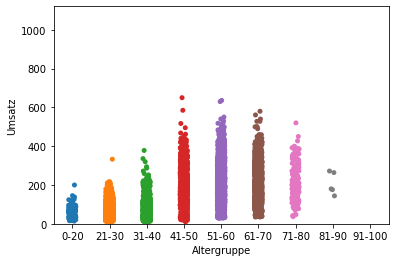

In [42]:
sns.histplot(data=df, x="Alter")

# create a new column with age groups (10-20, 21-30, 31-40, 41-50, 51-60, 61-70, 71-80, 81-90, 91-100)
df["Altergruppe"] = pd.cut(df["Alter"], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=["0-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100"])
sns.stripplot(data=df, x="Altergruppe", y="Umsatz", jitter=0.1)

In [11]:
df.groupby("Zahlungsmethode").agg({"Umsatz": "mean"})

,Umsatz
Zahlungsmethode,
Bar,141.536187
EC-Karte,139.903873
Kreditkarte,138.914361


In [43]:
import statsmodels.formula.api as smf

In [53]:
smf.ols("Umsatz ~ Zahlungsmethode + C(Monat)*Altergruppe", data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Umsatz   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     107.8
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:28:25   Log-Likelihood:                -56616.
No. Observations:               10000   AIC:                         1.134e+05
Df Residuals:                    9909   BIC:                         1.141e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               56.8205     31.280      1.817      0.069      -4.494     118.135
Zahlungsmethode[T.EC-Karte]             -1.0808      1.705     -0.634      0.526      -4.423       2.261
Zahlungsmethode[T.Kreditkarte]          -0.0610      1.731     -0.035      0.972      -3.454       3.332
C(Monat)[T.2]                            4.1140     37.717      0.109      0.913     -69.820      78.048
C(Monat)[T.3]                            4.4802     40.942      0.109      0.913     -75.774      84.734
C(Monat)[T.4]                            2.2022     36.106      0.061      0.951     -68.573      72.977
C(Monat)[T.5]                            1.9866     36.425      0.055      0.957     -69.415      73.388
C(Monat)[T.6]                            7.8485     37.713      0.208      0.835     -66.077      81.774
C(Monat)[T.7]                            2.1322     36.425      0.059      0.953     -69.268      73.533
C(Monat)[T.8]                           11.4310     36.795      0.311      0.756     -60.695      83.557
C(Monat)[T.9]                           16.0055     37.711      0.424      0.671     -57.916      89.927
C(Monat)[T.10]                           1.9039     35.346      0.054      0.957     -67.382      71.190
C(Monat)[T.11]                          24.1944     40.939      0.591      0.555     -56.055     104.443
C(Monat)[T.12]                          -2.6310     37.710     -0.070      0.944     -76.550      71.288
Altergruppe[T.21-30]                     2.3360     31.752      0.074      0.941     -59.904      64.576
Altergruppe[T.31-40]                     9.8939     32.080      0.308      0.758     -52.990      72.777
Altergruppe[T.41-50]                   136.2803     32.017      4.256      0.000      73.520     199.040
Altergruppe[T.51-60]                   157.0221     31.531      4.980      0.000      95.214     218.830
Altergruppe[T.61-70]                   143.6361     31.729      4.527      0.000      81.441     205.832
Altergruppe[T.71-80]                   140.1419     34.039      4.117      0.000      73.419     206.865
Altergruppe[T.81-90]                   117.2178     27.260      4.300      0.000      63.782     170.654
Altergruppe[T.91-100]                  7.67e-14   1.35e-13      0.566      0.571   -1.89e-13    3.42e-13
C(Monat)[T.2]:Altergruppe[T.21-30]       6.7029     38.510      0.174      0.862     -68.785      82.191
C(Monat)[T.3]:Altergruppe[T.21-30]      -3.6891     41.661     -0.089      0.929     -85.354      77.975
C(Monat)[T.4]:Altergruppe[T.21-30]       1.5276     36.905      0.041      0.967     -70.814      73.869
C(Monat)[T.5]:Altergruppe[T.21-30]       4.9490     37.192      0.133      0.894     -67.955      77.853
C(Monat)[T.6]:Altergruppe[T.21-30]    

In [30]:
sns.stripplot(df, x="Zahlungsmethode", y="Umsatz", alpha=0.3)

/Users/felix/opt/anaconda3/envs/mlbasic/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'Umsatz'

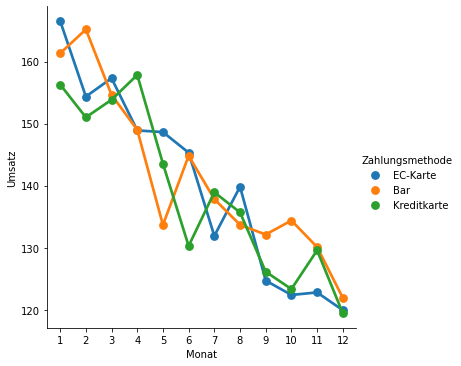

In [33]:
sns.catplot(data=df, x="Monat", y="Umsatz", kind="point", hue="Zahlungsmethode", ci=None)

In [9]:
# Check if average age of customes has changed over time (groupby Datum)
df.groupby("Monat").agg({"Alter": "mean"})

,Alter
Monat,
1,48.631887
2,47.513690
3,47.354460
4,46.174970
5,45.522248
6,44.457978
7,43.024561
8,43.577830
9,42.141304


<AxesSubplot:xlabel='Alter', ylabel='Count'>

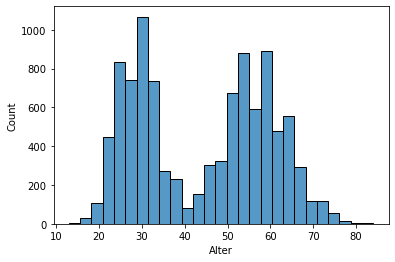

In [63]:
sns.histplot(data=df, x="Alter")

<AxesSubplot:xlabel='Monat'>

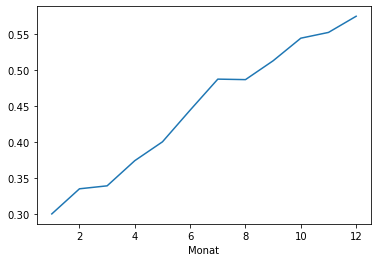

In [64]:
df = df.assign(Type=lambda x: np.where(x["Alter"] < 40, "Young", "Old"))

# Check if % of "Young" has changed over time
df.groupby("Monat")["Type"].value_counts(normalize=True).unstack()["Young"].plot()#.plot()

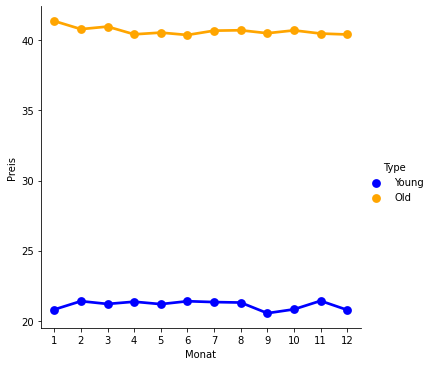

In [65]:

sns.catplot(x="Monat", y="Preis", data=df,  kind="point", palette={"Young": "blue", "Old": "orange"}, hue="Type", ci=None)

<AxesSubplot:xlabel='Datum'>

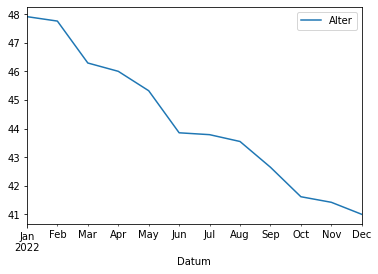

In [69]:
df.groupby(pd.Grouper(key="Datum", freq="M")).agg({"Alter": "mean"}).plot()

<AxesSubplot:xlabel='Alter'>

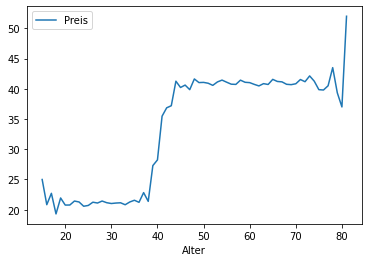

In [29]:
df.groupby(["Altera"]).agg({"Preis": "mean"}).plot()

In [13]:
df.drop(columns="Wochentag").to_csv("../_data/transactions_fashion_avenue.csv", index=False)

In [10]:
df.groupby(pd.Grouper(key="Uhrzeit", freq="H")).agg({"Menge": "mean"})

# define dict with different parameters for distribution for old and young customers

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'